In [1]:
import torch
from hydra import compose, initialize

import wandb
from src.eval.visualize import visualize_np
from src.utils.load_np import load_np

In [2]:
try:
    import torch_directml
    device = torch_directml.device() 
except ImportError:
    device = torch.device("cpu") 

In [3]:
# project = "cluster-sine"
# run = "magic-oath-9"

# dir = f"../models/{project}/{run}"

# api = wandb.Api()

# for s in ["dvinp.pth:v0", "optim.pth:v0", "cfg.yaml:v0"]:
#     artifact = api.artifact(f"{project}/{run}_{s}")
#     artifact.download(root=f"../models/{project}/{run}")

dir = f"../models/cnp"

In [4]:
with initialize(version_base=None, config_path=dir):
    cfg = compose(config_name="cfg")

    model, trainer, test_loader = load_np(
        cfg=cfg, 
        device=device, 
        dir=dir, 
    ) 


Generating tasks: 100%|██████████| 4096/4096 [00:00<00:00, 273918.10it/s]
Dropped Escape call with ulEscapeCode : 0x03007703


In [5]:
trainer.wandb_logging = False
if trainer.wandb_logging:
    wandb.init(project="np")

In [ ]:
train = True
if train:
    num_epochs = 30
    losses = trainer.train(
        num_epochs=num_epochs,
        max_clip_norm=cfg.training.max_clip_norm,
        alpha=cfg.training.alpha,
        validate=True
    )
    # torch.save(dvinp.state_dict(), f"{dir}/dvinp.pth")

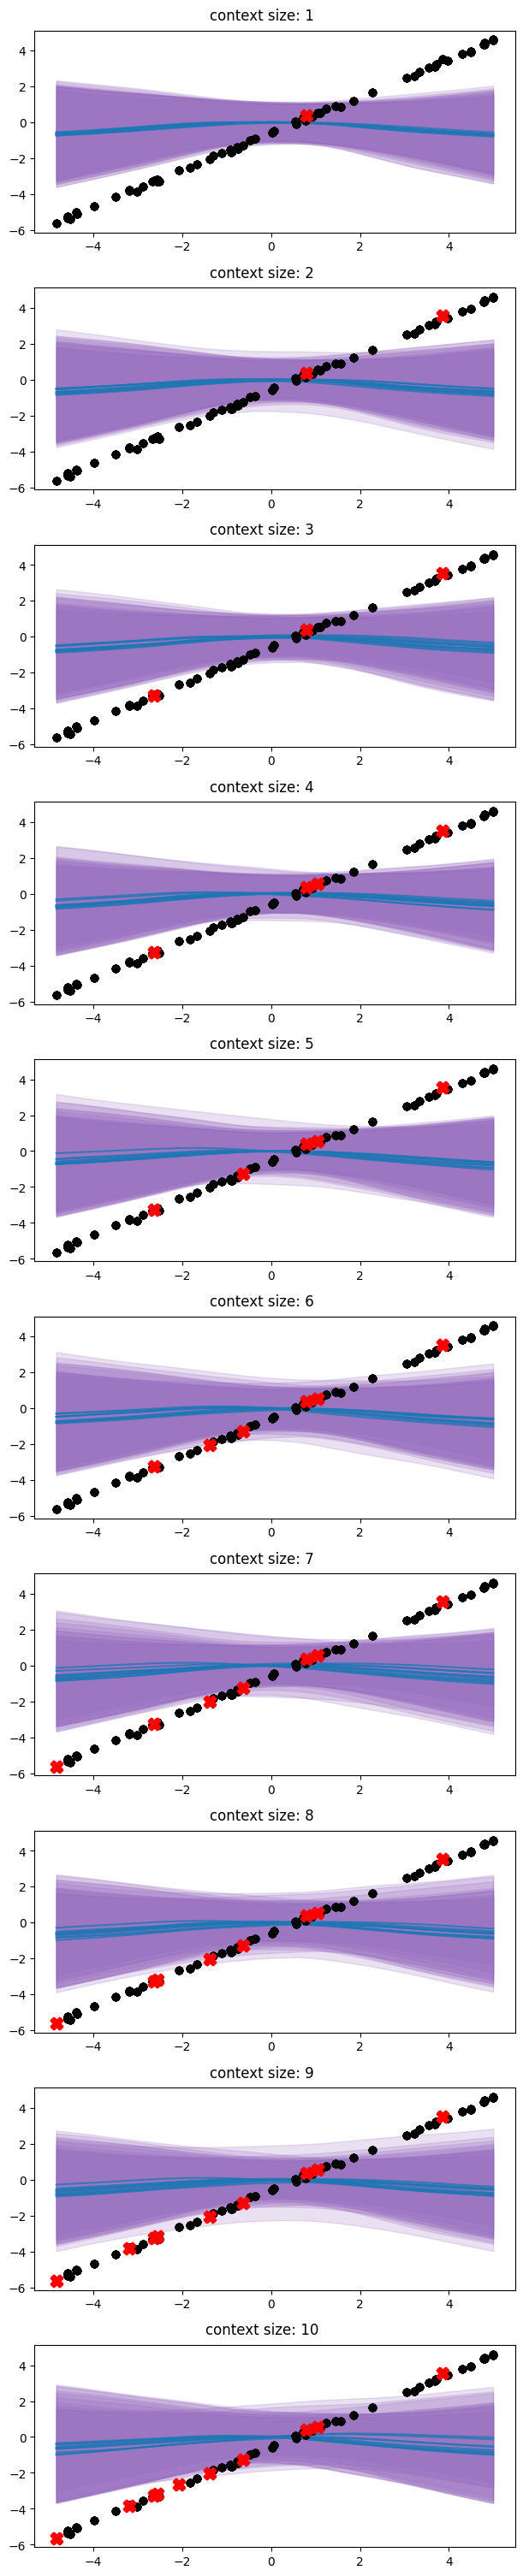

In [7]:
max_context_size = 10
num_samples = 10 # num_cells will be root

visualize_np(
    model=model,
    device=device,
    dataloader=test_loader,
    num_samples=num_samples,
    max_context_size=max_context_size,
)